<a href="https://colab.research.google.com/github/Siddhubollam9/fake_news_detection/blob/main/fake_news_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 💡 Project Title

Fake News Detection using Machine Learning

# 🧭 DAY 1 — Setup & Dataset Understanding
🎯 Goal

Understand the task → Set up your environment → Load and explore the dataset.

🧠 Concept Summary

Fake news detection is a text classification problem.
We’ll give a machine a news headline/article and ask it to classify:

“Is this REAL or FAKE?”

Machine Learning (ML) models don’t understand English words — they understand numbers.
So our job is to convert text → numbers → train a classifier → get predictions.

In [ ]:
pip install pandas numpy scikit-learn nltk matplotlib seaborn


In [ ]:
# Day 1 - Setup and Dataset Exploration

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import warnings
warnings.filterwarnings('ignore')


In [ ]:
# Load the fake and true news datasets
fake_df = pd.read_csv('Fake.csv')
true_df = pd.read_csv('True.csv')

print("Fake news samples:", fake_df.shape)
print("True news samples:", true_df.shape)


Fake news samples: (23481, 4)
True news samples: (21417, 4)


In [ ]:
# Add a label column to each dataset
fake_df['label'] = 0   # 0 → Fake
true_df['label'] = 1   # 1 → Real

# Combine both datasets
news_df = pd.concat([fake_df, true_df], axis=0).reset_index(drop=True)
news_df = news_df.sample(frac=1).reset_index(drop=True)  # shuffle


In [ ]:
print(news_df.head())
print(news_df['label'].value_counts())

# Check for missing values
print(news_df.isnull().sum())


                                               title  \
0  New York, other states challenge Trump over cl...   
1  Somalia hands over ONLF rebel leader to Ethiop...   
2   Nazis Whine Over Impending Release Of An Anti...   
3  CONSERVATIVE PRO-TRUMP Musician Who Performed ...   
4  GOP’s Jim Jordan to Lou Dobbs: It’s jail time!...   

                                                text       subject  \
0  WASHINGTON (Reuters) - A coalition of 17 U.S. ...  politicsNews   
1  ADDIS ABABA (Reuters) - Somali authorities hav...     worldnews   
2  With the rise of Donald Trump has also come th...          News   
3  Former Pussycat Dolls singer, Kaya Jones, has ...     left-news   
4  GOP Rep. Jim Jordan on Lou Dobbs: Listen you c...      politics   

               date  label  
0    April 5, 2017       1  
1  August 31, 2017       1  
2   October 8, 2017      0  
3      Oct 14, 2017      0  
4      Dec 14, 2017      0  
label
0    23481
1    21417
Name: count, dtype: int64
title      0
t

In [ ]:
print(news_df.head())
print(news_df['label'].value_counts())

# Check for missing values
print(news_df.isnull().sum())


                                               title  \
0  New York, other states challenge Trump over cl...   
1  Somalia hands over ONLF rebel leader to Ethiop...   
2   Nazis Whine Over Impending Release Of An Anti...   
3  CONSERVATIVE PRO-TRUMP Musician Who Performed ...   
4  GOP’s Jim Jordan to Lou Dobbs: It’s jail time!...   

                                                text       subject  \
0  WASHINGTON (Reuters) - A coalition of 17 U.S. ...  politicsNews   
1  ADDIS ABABA (Reuters) - Somali authorities hav...     worldnews   
2  With the rise of Donald Trump has also come th...          News   
3  Former Pussycat Dolls singer, Kaya Jones, has ...     left-news   
4  GOP Rep. Jim Jordan on Lou Dobbs: Listen you c...      politics   

               date  label  
0    April 5, 2017       1  
1  August 31, 2017       1  
2   October 8, 2017      0  
3      Oct 14, 2017      0  
4      Dec 14, 2017      0  
label
0    23481
1    21417
Name: count, dtype: int64
title      0
t

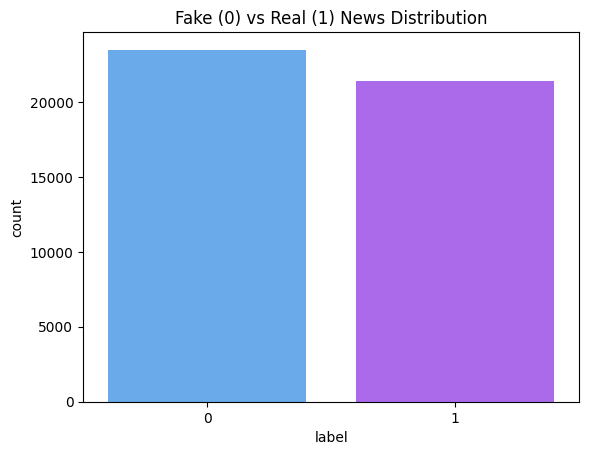

In [ ]:
sns.countplot(x='label', data=news_df, palette='cool')
plt.title("Fake (0) vs Real (1) News Distribution")
plt.show()


# Day 2
🎯 Goal

Clean and prepare the text data so that it’s ready for machine learning algorithms.

🧠 Concept Recap

Machine Learning algorithms understand numbers, not words.
So we must:

Clean the text → remove noise (punctuations, URLs, stopwords, etc.)

Normalize → lowercase everything, lemmatize words (run → running → run)

Convert text → numerical features using TF-IDF (Term Frequency - Inverse Document Frequency)

TF-IDF helps the model understand which words are important in each news article.
-------
We first clean the text to remove unwanted symbols and words.

Then we lemmatize to get base words (running → run).

Then we vectorize using TF-IDF, which converts each article into numbers.

Finally, we split the dataset for training and testing.

In [ ]:
pip install nltk scikit-learn


In [ ]:
import re
import string
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
nltk.download('stopwords')
nltk.download('wordnet')


**🧹 Step 1: Clean the Text**

We’ll clean the text column of news_df.

In [ ]:
# Check which column has the news text
print(news_df.columns)


In [ ]:
# Some datasets have separate title and text columns, we can merge them
if 'title' in news_df.columns and 'text' in news_df.columns:
    news_df['content'] = news_df['title'].astype(str) + " " + news_df['text'].astype(str)
else:
    news_df['content'] = news_df.iloc[:, 0].astype(str)  # if only one text column exists


In [ ]:
def clean_text(text):
    """
    Function to clean the input text step by step.
    """
    text = text.lower()                                   # lowercase all letters
    text = re.sub(r'https?://\S+|www\.\S+', '', text)     # remove URLs
    text = re.sub(r'<.*?>', '', text)                     # remove HTML tags
    text = re.sub(r'[%s]' % re.escape(string.punctuation), '', text)  # remove punctuation
    text = re.sub(r'\n', ' ', text)                       # remove newlines
    text = re.sub(r'\d+', '', text)                       # remove numbers
    text = re.sub(r'\s+', ' ', text).strip()              # remove extra spaces
    return text


In [ ]:
news_df['cleaned_text'] = news_df['content'].apply(clean_text)
print(news_df['cleaned_text'].head())


**🧠 Step 2: Remove Stopwords & Lemmatize**

Stopwords are common words like “the”, “is”, “on” — they don’t add meaning.
Lemmatization means converting words to their base form.

In [ ]:
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
    words = text.split()
    filtered_words = [lemmatizer.lemmatize(word) for word in words if word not in stop_words]
    return " ".join(filtered_words)

news_df['processed_text'] = news_df['cleaned_text'].apply(preprocess_text)


In [ ]:
vectorizer = TfidfVectorizer(max_features=5000)
X = vectorizer.fit_transform(news_df['processed_text'])
y = news_df['label']


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("Training samples:", X_train.shape)
print("Testing samples:", X_test.shape)


# 🧭 DAY 3 — Model Training
🎯 Goal

Train different ML models — compare their performance — and understand how each one works.

🧠 Concept Recap

We’ll train 3 traditional ML models:

1.Logistic Regression → baseline, simple and accurate for text classification.

2.Multinomial Naive Bayes → performs well with word-frequency data.

3.Random Forest → uses decision trees; good for generalization.

4.A small Neural Network (LSTM / Dense NN) — optional for extra learning.

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
# Logistic Regression Model
log_model = LogisticRegression(max_iter=200)
log_model.fit(X_train, y_train)

y_pred_log = log_model.predict(X_test)

# Evaluate
acc_log = accuracy_score(y_test, y_pred_log)
print(f"Logistic Regression Accuracy: {acc_log:.4f}")


Explanation:

max_iter=200 ensures convergence (it might need multiple iterations).

Logistic Regression calculates probability that an article is “real” or “fake.”

In [ ]:
# Multinomial Naive Bayes Model
nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)

y_pred_nb = nb_model.predict(X_test)

acc_nb = accuracy_score(y_test, y_pred_nb)
print(f"Naive Bayes Accuracy: {acc_nb:.4f}")


Explanation:

Naive Bayes works on the assumption that each word contributes independently.

It’s surprisingly good for text problems since word frequencies are key.

In [ ]:
# Random Forest Model
rf_model = RandomForestClassifier(n_estimators=120, random_state=42)
rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)

acc_rf = accuracy_score(y_test, y_pred_rf)
print(f"Random Forest Accuracy: {acc_rf:.4f}")


Explanation:

Uses multiple decision trees → majority voting decides the label.

Slower than others but can capture more complex relations.

In [ ]:
model_scores = pd.DataFrame({
    'Model': ['Logistic Regression', 'Naive Bayes', 'Random Forest'],
    'Accuracy': [acc_log, acc_nb, acc_rf]
})
print(model_scores)

sns.barplot(x='Model', y='Accuracy', data=model_scores, palette='mako')
plt.title("Model Comparison (Accuracy)")
plt.show()


Step 6 (Optional): Try a Simple Neural Network (Bonus)

We use two hidden layers (128 and 64 neurons).

Output layer has 1 neuron → predicts probability (0 = Fake, 1 = Real).

Trains using binary_crossentropy (for 2-class problems).

In [ ]:
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

# Neural Network model
nn_model = Sequential([
    Dense(128, activation='relu', input_dim=X_train.shape[1]),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')
])

nn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
nn_model.fit(X_train.toarray(), y_train, epochs=3, batch_size=64, validation_split=0.1)


Logistic Regression: checks linear relation between words and labels.

Naive Bayes: assumes words are independent but powerful for text.

Random Forest: ensemble of trees → strong, but slower.

Neural Net: learns complex non-linear patterns (bonus).

Each model learns from the TF-IDF vectors (numeric word importance features).

# 🧭 DAY 4 — Model Evaluation, Visualization & Saving
🎯 Goal

Evaluate all models (accuracy, precision, recall, F1)

Visualize confusion matrix & ROC curve

Choose the best model

Save it using pickle or joblib

🧠 Concept Recap

After training, we test how well our model performs using:

Accuracy → overall correctness

Precision → how many predicted fake were actually fake

Recall → how many actual fake were correctly detected

F1-score → harmonic mean of precision & recall

Visualization (confusion matrix, ROC) helps understand model strengths & weaknesses.

In [ ]:
from sklearn.metrics import roc_auc_score, roc_curve

def evaluate_model(y_true, y_pred, model_name):
    acc = accuracy_score(y_true, y_pred)
    prec = precision_score(y_true, y_pred)
    rec = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)

    print(f"\n📊 Performance of {model_name}")
    print(f"Accuracy : {acc:.4f}")
    print(f"Precision: {prec:.4f}")
    print(f"Recall   : {rec:.4f}")
    print(f"F1-Score : {f1:.4f}")

    # Confusion Matrix
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(5,4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Purples')
    plt.title(f"{model_name} - Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

    return acc, prec, rec, f1


In [ ]:
log_metrics = evaluate_model(y_test, y_pred_log, "Logistic Regression")
nb_metrics = evaluate_model(y_test, y_pred_nb, "Naive Bayes")
rf_metrics = evaluate_model(y_test, y_pred_rf, "Random Forest")


In [ ]:
# Predict probabilities
y_prob_log = log_model.predict_proba(X_test)[:,1]
y_prob_nb = nb_model.predict_proba(X_test)[:,1]
y_prob_rf = rf_model.predict_proba(X_test)[:,1]

fpr_log, tpr_log, _ = roc_curve(y_test, y_prob_log)
fpr_nb, tpr_nb, _ = roc_curve(y_test, y_prob_nb)
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_prob_rf)

plt.figure(figsize=(7,5))
plt.plot(fpr_log, tpr_log, label='Logistic Regression')
plt.plot(fpr_nb, tpr_nb, label='Naive Bayes')
plt.plot(fpr_rf, tpr_rf, label='Random Forest')
plt.plot([0,1], [0,1], 'k--')
plt.title("ROC Curve Comparison")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()


In [ ]:
comparison = pd.DataFrame({
    'Model': ['Logistic Regression', 'Naive Bayes', 'Random Forest'],
    'Accuracy': [log_metrics[0], nb_metrics[0], rf_metrics[0]],
    'Precision': [log_metrics[1], nb_metrics[1], rf_metrics[1]],
    'Recall': [log_metrics[2], nb_metrics[2], rf_metrics[2]],
    'F1-Score': [log_metrics[3], nb_metrics[3], rf_metrics[3]]
})

print("\n🔍 Model Performance Comparison:")
print(comparison.sort_values(by='Accuracy', ascending=False))


In [ ]:
import pickle

with open('best_model.pkl', 'wb') as file:
    pickle.dump(log_model, file)

print("✅ Best model saved successfully as 'best_model.pkl'")


We tested each model using accuracy, precision, recall, and F1-score.

Then visualized confusion matrix → shows where the model made mistakes.

ROC curve shows how confidently the model separates fake vs real.

Finally, we saved the best model to use later in an app (Day 5).

🧭 DAY 5 — Streamlit App + Report + Resume
🎯 Goal

Create a user interface for your model (Streamlit)

Run the app locally

Write a short report and resume-ready project summary

In [ ]:
import pickle

# Save both model and vectorizer
with open('best_model.pkl', 'wb') as f:
    pickle.dump(log_model, f)

with open('vectorizer.pkl', 'wb') as f:
    pickle.dump(vectorizer, f)

print("✅ Model and vectorizer saved successfully.")
